<a href="https://colab.research.google.com/github/R46a/STML-2303A52277/blob/main/stml_project(2303A52277).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STML PROJECT**

**Name : M . Raja**

**HT.No : 2303A52277**

**Batch** : **36**


## **DATASET :**

# **DIABETES**

In [1]:
import pandas as pd
import numpy as np
d=pd.read_csv("/content/diabetes_data_upload.csv")
print(d.head())


   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

In [2]:
X=d.drop('class',axis=1)
mle_params={}
y=d["class"]
print("target:")
print(y.head())
print("shape:",y.shape)
print("features:")
print(X.head())

target:
0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: class, dtype: object
shape: (520,)
features:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes         

In [3]:
S=X.replace({'Male':1,'Female':0,'Yes':1,'No':0})
print(S)
Y=y.replace({'Positive':1,'Negative':0})
print(Y)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0               0                0        1   

<ipython-input-3-e79e090bab8f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  S=X.replace({'Male':1,'Female':0,'Yes':1,'No':0})
<ipython-input-3-e79e090bab8f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y=y.replace({'Positive':1,'Negative':0})


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(S, Y , test_size=0.2, random_state=30)
print("X_train:",X_train)
print("X_test:",X_test)
print("Y_train:",y_train)
print("Y_train:",y_test)

X_train:      Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
195   31       1         1           0                   0         0   
349   37       1         0           0                   0         0   
257   48       0         1           1                   0         1   
157   48       1         1           1                   1         0   
459   57       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
430   32       1         0           0                   0         0   
145   61       1         1           0                   0         1   
140   47       1         1           1                   0         0   
500   66       1         1           0                   1         0   
421   61       0         1           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
195           1               0                1   

#**Logistic Regression**

In [5]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
lr=LR.fit(X_train,y_train)
print("coefficient:",lr.coef_)
print("intercept:",lr.intercept_)

coefficient: [[-0.02698604 -2.60136808  2.48594712  2.86268139  0.60790669  0.34334826
   1.04831723  1.13493086  0.6559378  -1.38534348  1.47220207 -0.43748972
   1.04402217 -0.42196691 -0.00355869 -0.21565816]]
intercept: [1.15463711]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Accuracy** , **Confusion Matrix , Classification report**

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = lr.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.9471153846153846
confusion matrix:
[[152   7]
 [ 15 242]]
classification report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       159
           1       0.97      0.94      0.96       257

    accuracy                           0.95       416
   macro avg       0.94      0.95      0.94       416
weighted avg       0.95      0.95      0.95       416



#**SVC**

In [7]:
from sklearn.svm import SVC
SV= SVC()
sv=SV.fit(X_train,y_train)
print("intercept:",sv.intercept_)

intercept: [0.73657188]


# **Accuracy , Confusion Matrix , Classification report**

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = sv.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.6177884615384616
confusion matrix:
[[  0 159]
 [  0 257]]
classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       159
           1       0.62      1.00      0.76       257

    accuracy                           0.62       416
   macro avg       0.31      0.50      0.38       416
weighted avg       0.38      0.62      0.47       416



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Perceptron**

In [9]:
from sklearn.linear_model import Perceptron
PR= Perceptron()
pr=PR.fit(X_train,y_train)
print("intercept:",pr.intercept_)
print("coefficient:",pr.coef_)

intercept: [-87.]
coefficient: [[  17. -539.  718.  713.  359.   90.  287.  198.  202. -183.  310.  -81.
   363.  -28. -259.   35.]]


# **Accuracy , Confusion Matrix , Classification report**


In [10]:
from sklearn.metrics import accuracy_score
y_pred = pr.predict(X_train)
print("accuracy:",accuracy_score(y_train, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_train,y_pred))
print("classification report:")
print(classification_report(y_train,y_pred))

accuracy: 0.7451923076923077
confusion matrix:
[[ 56 103]
 [  3 254]]
classification report:
              precision    recall  f1-score   support

           0       0.95      0.35      0.51       159
           1       0.71      0.99      0.83       257

    accuracy                           0.75       416
   macro avg       0.83      0.67      0.67       416
weighted avg       0.80      0.75      0.71       416



#**KNN**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuraries=[]
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  KN=knn.fit(X_train, y_train)
  y_pred = KN.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for k={i}: {accuracy}")
  accuraries.append(accuracy)

Accuracy for k=1: 0.9519230769230769
Accuracy for k=2: 0.9038461538461539
Accuracy for k=3: 0.9038461538461539
Accuracy for k=4: 0.8557692307692307
Accuracy for k=5: 0.8942307692307693
Accuracy for k=6: 0.8076923076923077
Accuracy for k=7: 0.7980769230769231
Accuracy for k=8: 0.7596153846153846
Accuracy for k=9: 0.7884615384615384


#**Generating Learning Curves:**

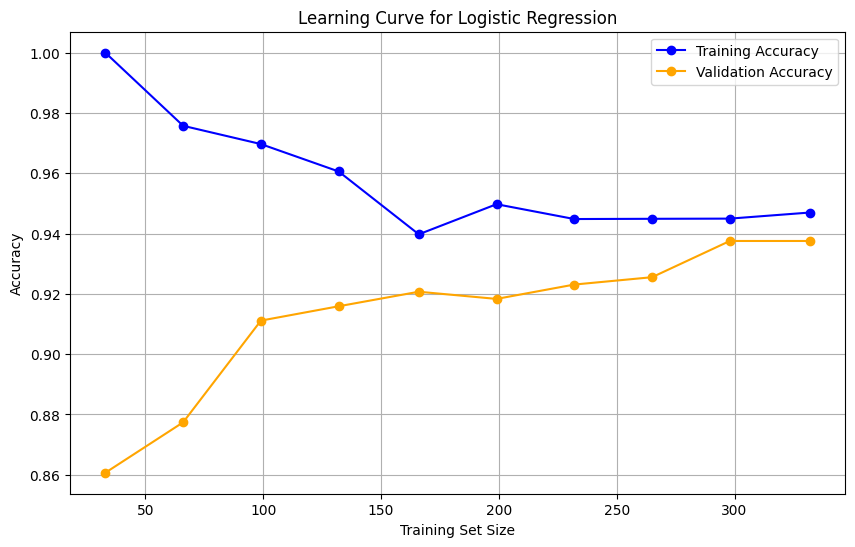

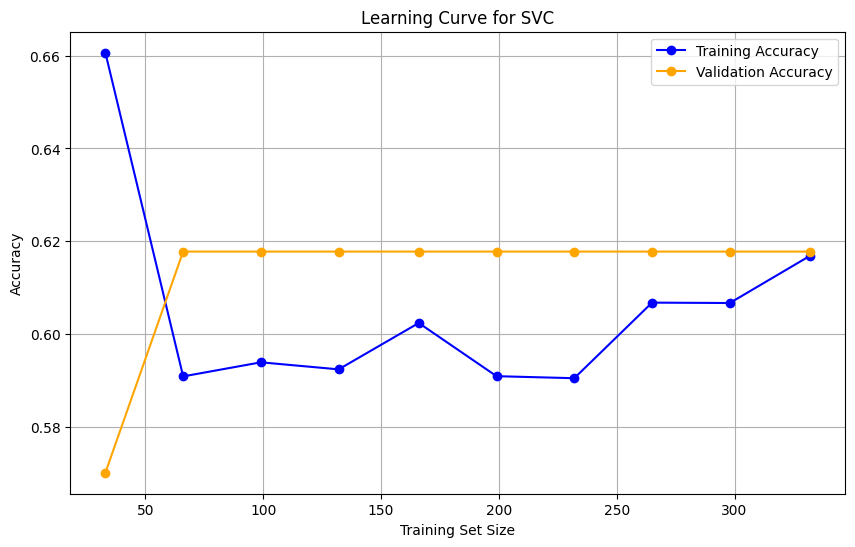

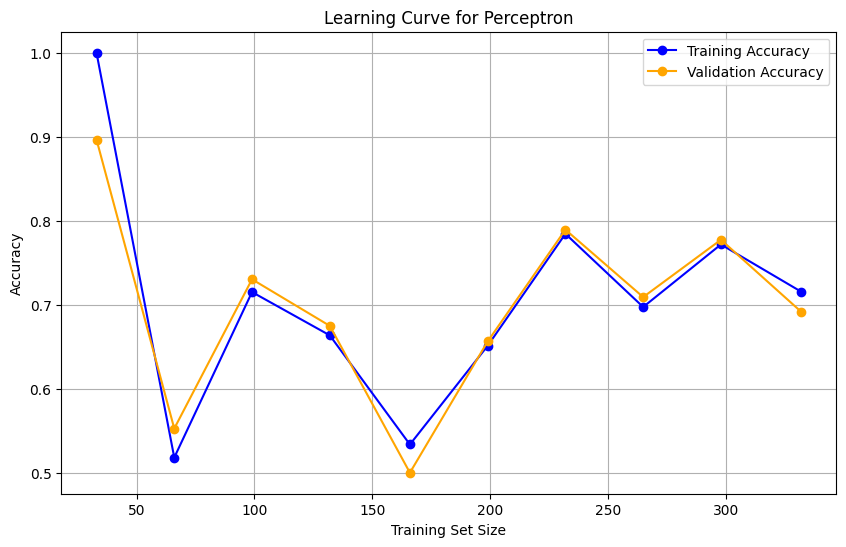

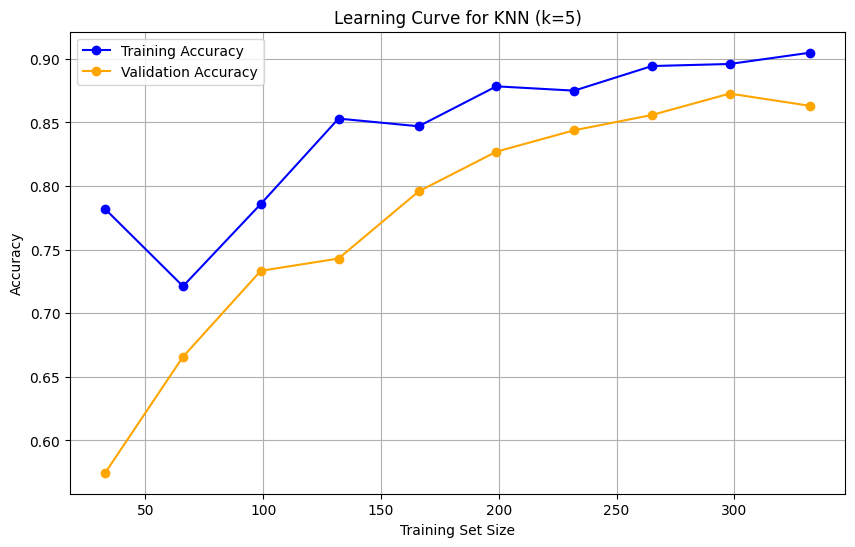

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring="accuracy", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Accuracy", color="orange")
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Example for each model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, y_train, X_test, y_test are already defined
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Perceptron": Perceptron(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    plot_learning_curve(model, X_train, y_train, f"Learning Curve for {name}")
